In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

/home/adminroot/miniconda3/envs/distill_data/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
training_data=datasets.FashionMNIST(
    root="fun_data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="fun_data",
    train=False,
    download=True,
    transform=ToTensor()
)

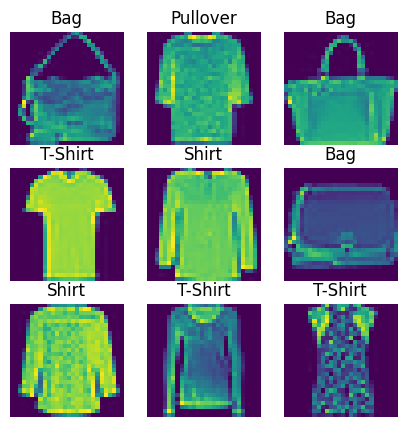

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure=plt.figure(figsize=(5,5))
cols,rows=3,3
for i in range(1,cols*rows+1):
    sample_index=torch.randint(len(training_data),size=(1,)).item()
    img,label=training_data[sample_index]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [5]:
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
    '''
    get the length of dataset by len()
    '''
    def __init__(self,annotations_file,img_dir,transform=None,target_transform=None) -> None:
        # super().__init__()
        self.image_labels=pd.read_csv(annotations_file)
        self.img_dir=img_dir
        self.transform=transform
        self.target_transform=target_transform
    def __len__(self):
        return len(self.image_labels)
    def __getitem__(self, index):
        img_path=os.path.join(self.img_dir,self.image_labels.iloc[index,0])
        image=read_image(img_path)
        label=self.image_labels.iloc[index,1]
        if self.transform:
            image=self.transform(image)
        if self.target_transform:
            label=self.target_transform(label)
        return image,label


In [6]:
print(type(training_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [7]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)


In [9]:
train_features,train_labels=next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"label batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
label batch shape: torch.Size([64])


torch.Size([1, 28, 28])
torch.Size([28, 28])


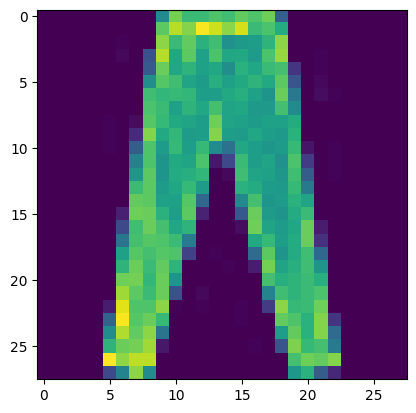

Label: 1


In [16]:
img=train_features[0].squeeze()
print(train_features[0].size())
print(img.size())
label=train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")